In [11]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [12]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2)+ 0.2*torch.rand(x.size())

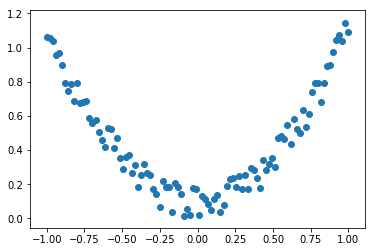

In [13]:
plt.scatter(x.data.numpy(),y.data.numpy())

In [14]:
#单层的神经网络，由隐含层作一次线性映射，进行激励变换后再由输出层进行一次线性映射
class Net(torch.nn.Module):
        def __init__(self,n_feature,n_hidden,n_output):
            super(Net,self).__init__()#继承module的功能
            self.hidden = torch.nn.Linear(n_feature,n_hidden)
            self.predict = torch.nn.Linear(n_hidden,n_output)
            
        def forward(self,x):
            x = F.relu(self.hidden(x))
            x = self.predict(x)
            return x
        

In [15]:
net = Net(n_feature = 1,n_hidden = 10,n_output = 1)#生成单输入单输出，隐藏层有十个神经元的神经网络

In [16]:
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


#后面是训练部分

In [17]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
loss_func = torch.nn.MSELoss() #预测值和真实值的误差计算公式(函数指针赋值)

可视化模块

In [18]:
import matplotlib.pyplot as plt

ion(interactive on) 打开matplotlib的交互模式，可以输出动态图

In [19]:
plt.ion()
plt.show()

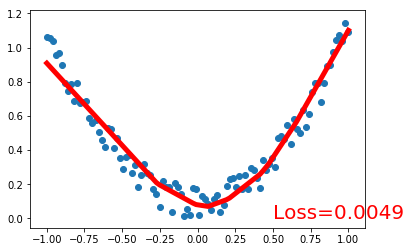

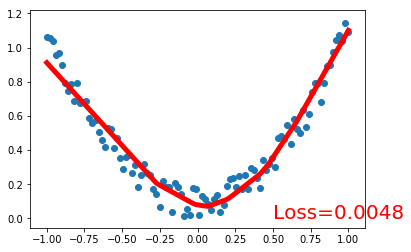

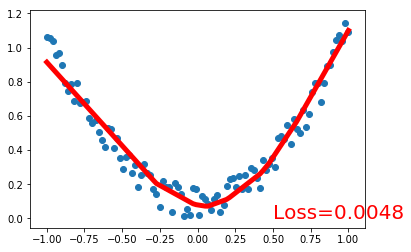

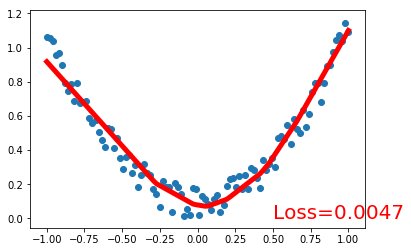

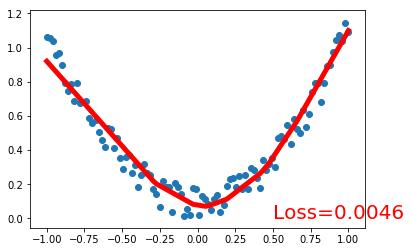

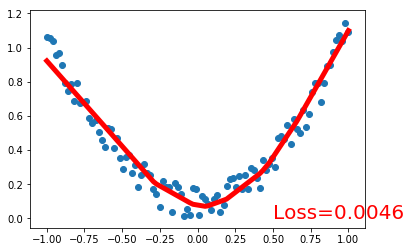

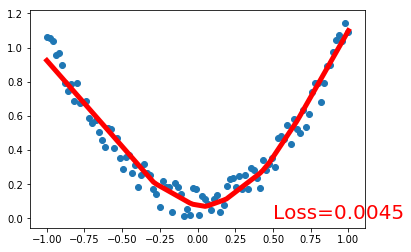

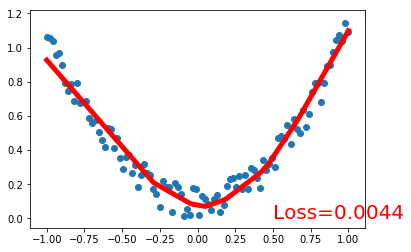

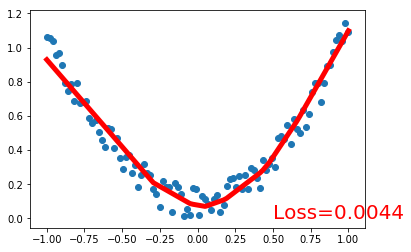

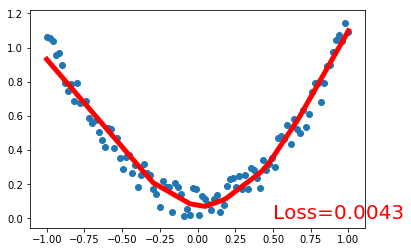

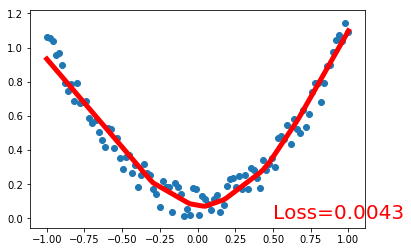

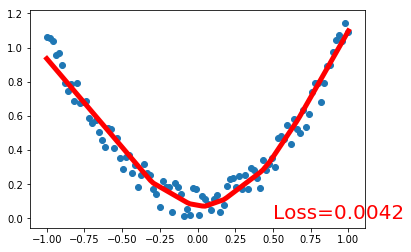

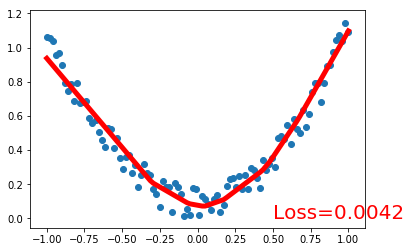

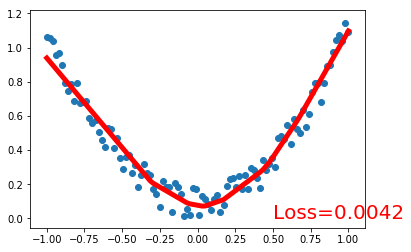

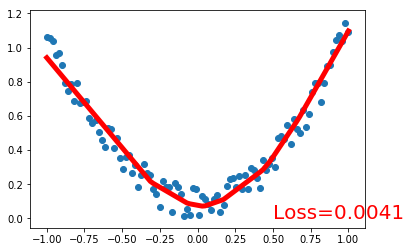

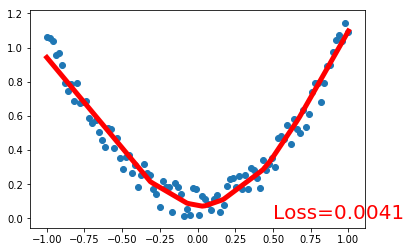

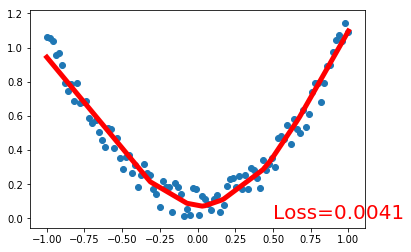

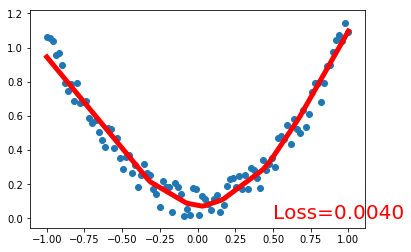

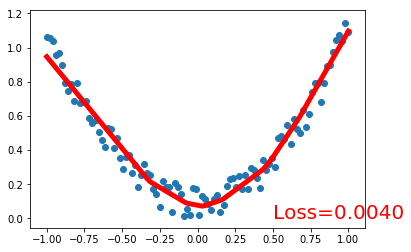

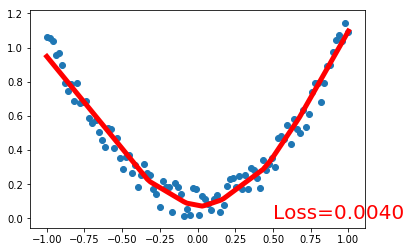

In [22]:
for t in range(100):
    prediction = net(x) #传入训练数据X
    
    loss = loss_func(prediction,y) #计算误差
    
    optimizer.zero_grad() # 清空上一步的残余更新参数值
    loss.backward() # 将误差反向传播，计算参数更新值
    optimizer.step() #将参数更新值施加到net上
    
    if t % 5 ==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw = 5)
        plt.text(0.5,0,'Loss=%.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()